In [1]:
from astropy.io import fits
from astropy.table import Table, Column
from photutils import CircularAperture, aperture_photometry
import numpy as np
import glob
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
hdu_filenames = glob.glob('//data1//tso_analysis//wlp8_sub_data//*.fits')
hdu_filenames

['//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I001.slp.fits',
 '//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I002.slp.fits',
 '//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I003.slp.fits',
 '//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I004.slp.fits',
 '//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I005.slp.fits',
 '//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I006.slp.fits',
 '//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I007.slp.fits',
 '//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I008.slp.fits',
 '//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I009.slp.fits',
 '//data1/

In [3]:
center = (167,161)
t = Table(names=('Flux','x','y'))
for hdus in hdu_filenames:
    hdu = fits.open(hdus)
    image = hdu[0].data
    image2d = image[0,:,:]
    mask = np.isnan(image2d) == True
    aperture = CircularAperture(center, r = 67)
    phot_table = aperture_photometry(image2d, aperture, mask = mask)
    t.add_row(phot_table[0]) #Because you have to add a single row, so you have to do phot_table[0]
    hdu.close()
t

Flux,x,y
float64,float64,float64
3399777.02284,167.0,161.0
3404677.53509,167.0,161.0
3428783.86483,167.0,161.0
3405940.31731,167.0,161.0
3404091.88613,167.0,161.0
3403700.37014,167.0,161.0
3418287.90321,167.0,161.0
3408835.07151,167.0,161.0
3410553.96641,167.0,161.0


In [5]:
center = (167,161)
t = Table(names=('Flux','Time'))
for hdus in hdu_filenames:
    hdu = fits.open(hdus)
    image = hdu[0].data
    image2d = image[0,:,:]
    mask = np.isnan(image2d) == True
    aperture = CircularAperture(center, r = 67)
    phot_table = aperture_photometry(image2d, aperture, mask = mask)
    header = hdu[0].header
    time = [(header["NGROUP"] + 1) * header["TGROUP"] * (header["ON_NINT"] - 1)]
    a = [phot_table[0][0]]
    b = time
    t.add_row([a,b])
    hdu.close()
t

Flux,Time
float64,float64
3399777.02284,0.0
3404677.53509,22.38012
3428783.86483,44.76024
3405940.31731,67.14036
3404091.88613,89.52048
3403700.37014,111.9006
3418287.90321,134.28072
3408835.07151,156.66084
3410553.96641,179.04096


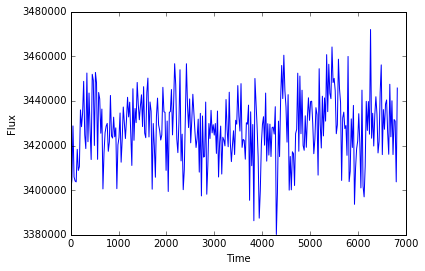

In [6]:
x = t['Time']
y = t['Flux']
plt.plot(x, y)
plt.ylabel('Flux')
plt.xlabel('Time')